In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.formula.api as smf
import scipy as stats

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\Sureksha\\Downloads'

In [4]:
os.chdir('E:\\DS ASSIGNMENTS\\4.Simple linear regression')

In [5]:
os.listdir()

['delivery_time.csv', 'Problem_statements.txt', 'Salary_Data.csv']

In [6]:
data=pd.read_csv('delivery_time.csv')

In [8]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [9]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [10]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [12]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [13]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [14]:
data.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Delivery Time,0.352390,0.317960
Sorting Time,0.047115,-1.148455


In [15]:
data_log=np.log(data)
data_log

,Delivery Time,Sorting Time
0,3.044522,2.302585
1,2.602690,1.386294
2,2.983153,1.791759
3,3.178054,2.197225
4,3.367296,2.302585
5,2.731115,1.791759
6,2.944439,1.945910
7,2.251292,1.098612
8,2.884801,2.302585
9,2.931194,2.197225


# before applying log

C:\Users\Sureksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

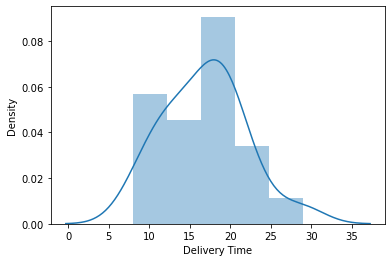

In [19]:
sns.distplot(data['Delivery Time'])

C:\Users\Sureksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

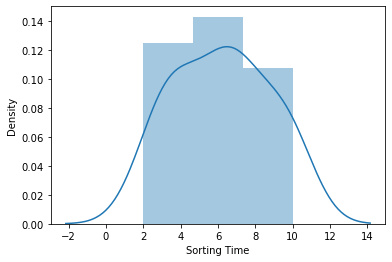

In [20]:
sns.distplot(data['Sorting Time'])

# after applying log

C:\Users\Sureksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

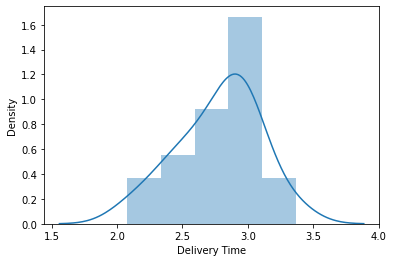

In [21]:
sns.distplot(data_log['Delivery Time'])

C:\Users\Sureksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

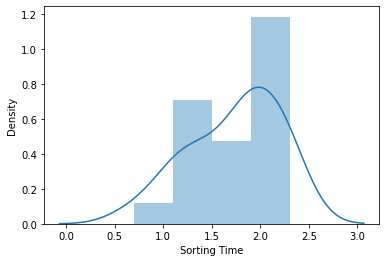

In [23]:
sns.distplot(data_log['Sorting Time'])

In [24]:
### Linear Regression
X=data_log[['Sorting Time']].values
Y=data_log[['Delivery Time']].values

In [25]:
model=smf.ols('Y~X',data=data_log).fit()

<AxesSubplot:xlabel='Sorting Time', ylabel='Delivery Time'>

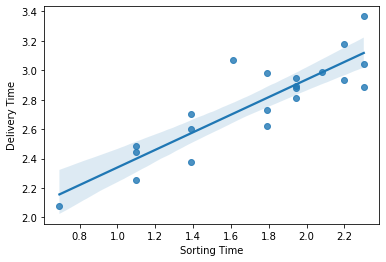

In [26]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=data_log)

In [27]:
## Coefficients
model.params

Intercept    1.741987
X            0.597522
dtype: float64

In [28]:
## t value and p value
print(model.tvalues, '\n',model.pvalues)

Intercept    13.085552
X             8.024484
dtype: float64 
 Intercept    5.921137e-11
X            1.601539e-07
dtype: float64


In [29]:
# R squared values
model.rsquared,model.rsquared_adj

(0.77216134926874, 0.7601698413355158)

In [30]:
##  Predicting the new data point
newdata=pd.Series([4,8])

In [31]:
data_pred=pd.DataFrame(newdata,columns=['X'])

In [32]:
model.predict(data_pred)

0    4.132076
1    6.522166
dtype: float64

# Q.2

In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import statsmodels.formula.api as smf
import scipy as stats

In [34]:
data=pd.read_csv('E:\\DS ASSIGNMENTS\\4.Simple linear regression\\Salary_Data.csv')
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [35]:
data1=data.rename({'YearsExperience':'Years_Experience'},axis=1)
data1

,Years_Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [36]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Years_Experience  30 non-null     float64
 1   Salary            30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [37]:
data1.head()

,Years_Experience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [38]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [39]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [40]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [41]:
data.agg(['skew','kurtosis']).transpose()

,skew,kurtosis
YearsExperience,0.37956,-1.012212
Salary,0.35412,-1.295421


In [42]:
data_log=np.log(data1)
data_log

,Years_Experience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


C:\Users\Sureksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Years_Experience', ylabel='Density'>

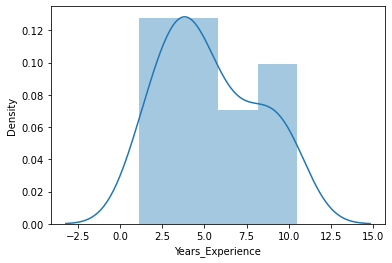

In [43]:
sns.distplot(data1['Years_Experience'])

C:\Users\Sureksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

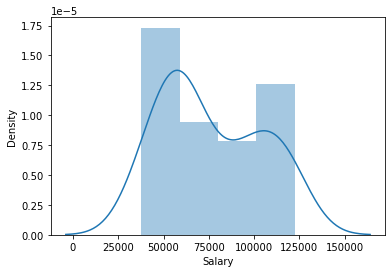

In [44]:
sns.distplot(data1['Salary'])

C:\Users\Sureksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Years_Experience', ylabel='Density'>

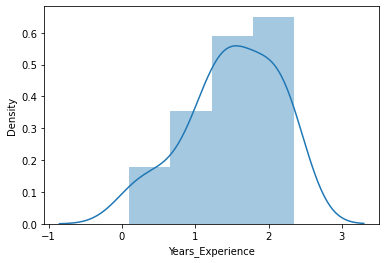

In [45]:
sns.distplot(data_log['Years_Experience'])

C:\Users\Sureksha\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

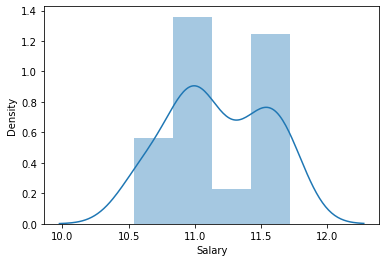

In [46]:
sns.distplot(data_log['Salary'])

In [47]:
## LINEAR REGRESSION
X=data_log[['Years_Experience']].values
Y=data_log[['Salary']].values

In [48]:
model=smf.ols('Y~X',data=data_log).fit()

<AxesSubplot:xlabel='Years_Experience', ylabel='Salary'>

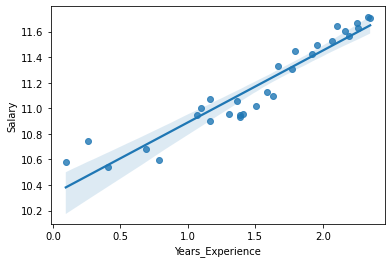

In [49]:
sns.regplot(x='Years_Experience',y='Salary',data=data_log)

In [50]:
## Coefficients
model.params

Intercept    10.328043
X             0.562089
dtype: float64

In [51]:
## T values and p values
print(model.tvalues, '\n',model.pvalues) 

Intercept    184.867959
X             16.352542
dtype: float64 
 Intercept    9.073132e-45
X            7.395278e-16
dtype: float64


In [52]:
## R squared values
(model.rsquared,model.rsquared_adj)

(0.9052150725817149, 0.9018298966024904)

In [53]:
## Predicting the new point
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [54]:
data_pred=pd.DataFrame(new_data,columns=['X'])
data_pred

,X
0,3
1,5


In [55]:
model.predict(data_pred)

0    12.014310
1    13.138487
dtype: float64